# Capstone Project: Stock Price
### By: Ani Iyer


In this file I will clean, explore, and derive insights from public datasets containing the historical stock information for different tech companies.

## Import Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
mpl.rcParams['figure.figsize'] = (20,5)
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

## Import Datasets

In [2]:
market_cap = pd.read_csv('Top 10 Companies By Market Cap.csv')
market_cap["Market Cap"] = pd.to_numeric(market_cap["Market Cap"], downcast="float")

## Data Cleaning

In [3]:
companies = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'ADBE', 'CRM', 'INTC', 'SAP', 'ORCL', 'CSCO']

dataframe = []
for ticker in companies:
    file_name = "%s.csv" % ticker
    file = pd.read_csv(file_name, header=0, index_col='Date')
    file[str(ticker)] = file[' Close/Last']
    file.drop(file.iloc[:, 0:5], inplace = True, axis=1)
    dataframe.append(file)

df = pd.concat(dataframe, axis=1)
df = df.replace('\$','',regex=True).astype(float)
df = df.reindex(index=df.index[::-1])
df

,AAPL,MSFT,TSM,NVDA,ADBE,CRM,INTC,SAP,ORCL,CSCO
10/15/2010,11.24,25.54,10.34,11.29,28.08,27.10,NaN,52.94,28.90,23.36
10/18/2010,11.36,25.82,10.30,11.36,28.06,26.41,NaN,52.75,29.23,23.30
10/19/2010,11.05,25.10,10.20,11.29,27.58,25.91,NaN,51.18,29.13,22.97
10/20/2010,11.09,25.31,10.33,11.29,28.21,26.11,NaN,51.67,28.64,23.40
10/21/2010,11.05,25.42,10.41,11.09,27.70,26.33,NaN,52.51,28.82,23.26
...,...,...,...,...,...,...,...,...,...,...
10/9/2020,116.97,215.81,88.78,550.51,502.16,265.98,52.82,157.14,61.15,39.85
10/12/2020,124.40,221.40,90.91,569.04,510.89,267.07,53.88,158.77,61.46,40.36
10/13/2020,121.10,222.86,89.64,569.93,514.31,266.83,53.83,156.60,60.97,39.81
10/14/2020,121.19,220.86,88.60,563.81,506.31,261.83,53.55,157.44,60.96,39.89


## Issues/Hypotheses to Explore

### Top 10 Largest Tech Companies by Market Cap

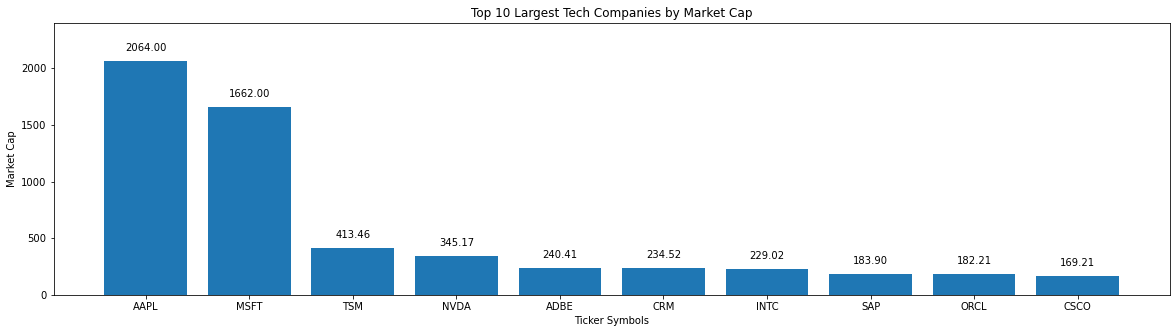

In [4]:
x = market_cap['Symbol']
y = market_cap['Market Cap']

plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(x, y)
plt.title('Top 10 Largest Tech Companies by Market Cap')
plt.xlabel('Ticker Symbols')
plt.ylabel('Market Cap')
plt.ylim(0, 2400)
for x,y in zip(x,y):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

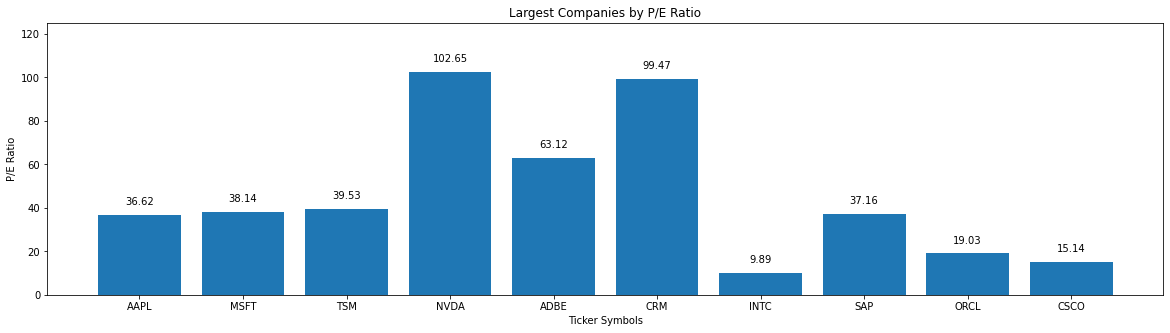

In [5]:
x = market_cap['Symbol']
y = market_cap['PE Ratio']

plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(x, y)
plt.title('Largest Companies by P/E Ratio')
plt.xlabel('Ticker Symbols')
plt.ylabel('P/E Ratio')
plt.ylim(0, 125)
for x,y in zip(x,y):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

### Stock Price in 2020

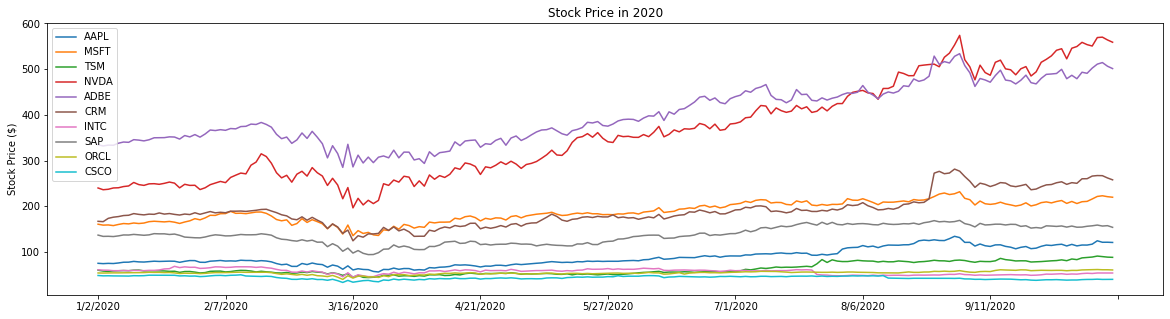

In [6]:
df_sp = df.copy()
df_sp = df[2318:]

df_sp.plot(kind='line')
plt.title('Stock Price in 2020')
plt.ylabel('Stock Price ($)')
plt.show()

### Weekly Moving Average in 2020

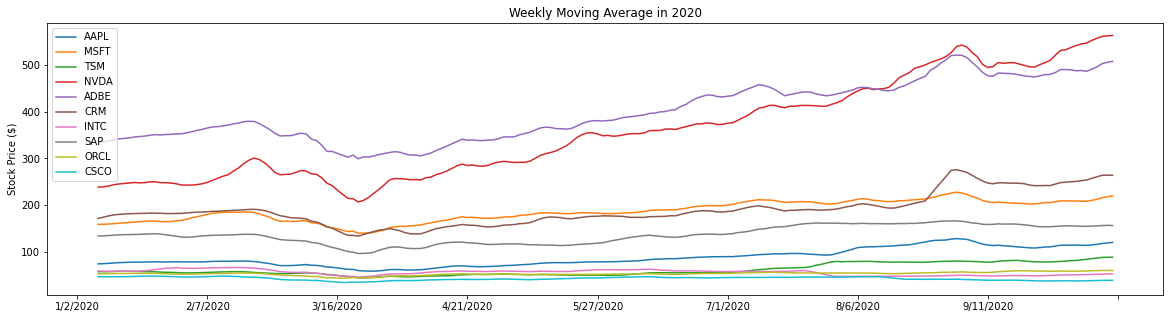

In [7]:
sma_weekly = df.copy()
sma_weekly = sma_weekly[2318:]

for ticker in companies:
    sma_weekly[ticker] = sma_weekly[ticker].rolling(window=5).mean()
    
sma_weekly.plot(kind='line')
plt.title('Weekly Moving Average in 2020')
plt.ylabel('Stock Price ($)')
plt.show()

### Weekly Moving Average: Price vs. Volume

In [8]:
AAPL = pd.read_csv('AAPL.csv', index_col='Date')
AAPL = AAPL.replace('\$','',regex=True).astype(float)
AAPL = AAPL.reindex(index=AAPL.index[::-1])


AAPL['Weekly Price Average'] = AAPL[' Close/Last'].rolling(window=5).mean()
AAPL['Weekly Volume Average'] = AAPL[' Volume'].rolling(window=5).mean()

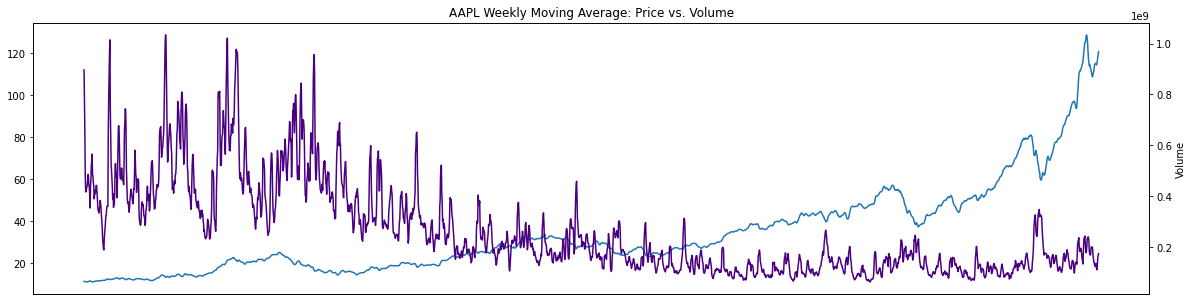

In [9]:
ax = AAPL['Weekly Price Average'].plot()
ax2 = ax.twinx()
ax2.plot(AAPL['Weekly Volume Average'], 'indigo')
plt.title('AAPL Weekly Moving Average: Price vs. Volume')
plt.xticks([], [])
ax.axes.get_xaxis().set_visible(False)
plt.ylabel('Volume')
plt.show()

## Insights

### Cumulative Percent Return in 2020

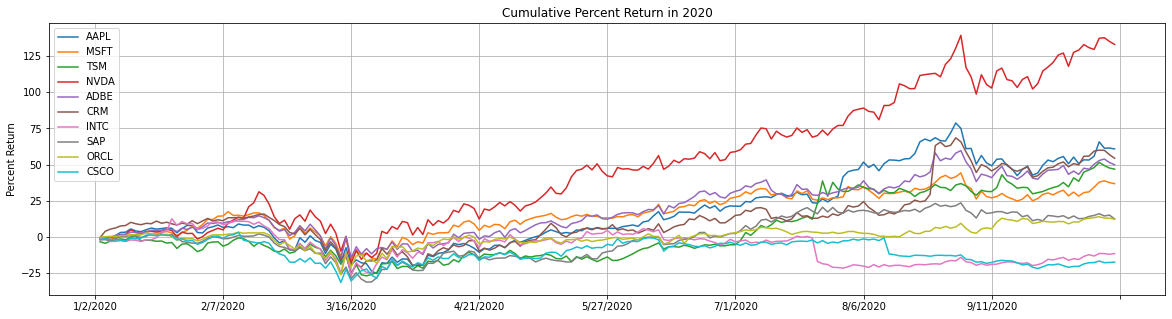

In [10]:
cpr = df.copy()
cpr = cpr[2318:]

def cum_return(price):
    pr = price.pct_change()
    pr_plus_one = pr.add(1)
    cumulative_return = pr_plus_one.cumprod().sub(1)
    return cumulative_return

for ticker in companies:
    cpr[ticker] = cum_return(cpr[ticker])

cpr.mul(100).plot(kind='line')
plt.title('Cumulative Percent Return in 2020')
plt.ylabel('Percent Return')
plt.xlim()
plt.grid()
plt.show()

### Despite the market crash caused by the global pandemic, Nvidia has seen over 125% return since the beginning of the year

<ol>
	<li>With the exception of Apple, the companies with the largest P/E ratios (NVDA, ADBE, CRM) have seen the largest returns.</li>
    <li>The global pandemic has shifted people to work and find entertainment at home, which may possibly explain the rapid growth of the gaming company Nvidia, and the computer software companies of Adobe and Salesforce.</li> 
    <li>From the graph above, it is clear that investment portfolios that have a strong weight in the tech sector will not perform as well if they have significant shares of Cisco and Intel.</li> 
</ol>

### Regression of Volume on Price

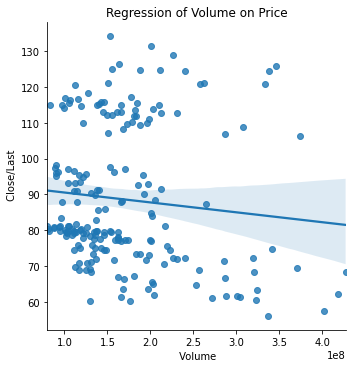

In [11]:
AAPL_2020 = AAPL[2318:]
sns.lmplot(x=' Volume', y=' Close/Last', data=AAPL_2020)
plt.title('Regression of Volume on Price')
plt.show()

### Volume of trading for the company stock does not seem to have a strong relation on the stock price

<ol>
	<li>The relationship between volume of trading and stock price seem non-existent when comparing individual data points, but also when comparing weekly averages as seen in later visualizations.</li>
    <li>Investors pursuing individual tech stocks for their portfolio should avoid relying solely on trade volume as a technical indicator to predict stock price movement.</li>
</ol>